In [103]:
import pandas as pd
import altair as alt
alt.renderers.enable('notebook')
import matplotlib.pyplot as plt
import numpy as np


from collections import defaultdict

In [5]:
df = pd.read_csv('mistborn-eyebrow.txt', sep='\t')
df.head()

,page,character,target,book
0,2,obligator,tresting,1
1,8,kelsier,tepper,1
2,25,laird,camon,1
3,26,laird,camon,1
4,30,dockson,kelsier,1


In [7]:
dfg = df.groupby("book")

In [15]:
# final empire
fe = dfg.get_group(1)
print("Final Empire count:", fe.shape[0])

# well of ascension
wa = dfg.get_group(2)
print("Well of Ascension count:", wa.shape[0])

# hero of ages 
ha = dfg.get_group(3)
print("Hero of ages count:", ha.shape[0])

Final Empire count: 53
Well of Ascension count: 48
Hero of ages count: 43


## Which characters raise their eyebrows the most?

In [22]:
fe.groupby('character').size().reset_index(name="counts")

,character,counts
0,breeze,6
1,dockson,3
2,elend,3
3,ham,5
4,jastes,1
5,kelsier,19
6,laird,2
7,marsh,1
8,obligator,1
9,sazed,3


In [107]:
fe_raisers = defaultdict(int,fe.character.value_counts())
print(fe_raisers)

fe_raisees = defaultdict(int,fe.target.value_counts())
print(fe_raisees)

all_chars = set(list(fe_raisers.keys()) + list(fe_raisees.keys()))
all_chars

# build raiser/raisee count df
data = [(x, fe_raisers[x], fe_raisees[x]) for x in all_chars]
raise_df = pd.DataFrame(data, columns=['character','raiser','raisee']).sort_values("raiser",ascending=False)

defaultdict(<class 'int'>, {'kelsier': 19, 'vin': 8, 'breeze': 6, 'ham': 5, 'dockson': 3, 'elend': 3, 'sazed': 3, 'laird': 2, 'jastes': 1, 'marsh': 1, 'obligator': 1, 'shan': 1})
defaultdict(<class 'int'>, {'vin': 22, 'elend': 6, 'kelsier': 6, 'sazed': 4, 'ham': 4, 'breeze': 2, 'camon': 2, 'soldier': 1, 'tresting': 1, 'bevidon': 1, 'yeden': 1, 'tepper': 1, 'hoyd': 1, 'spook': 1})


In [100]:
x_order = list(fe_raisers)


In [96]:
data_melt = raise_df.melt(id_vars='character',
                          value_vars=['raiser','raisee'],
                          var_name="eyebrow",
                          value_name="count").sort_values('count',ascending=False)
data_melt

,character,eyebrow,count
35,vin,raisee,22
0,kelsier,raiser,19
15,vin,raiser,8
38,elend,raisee,6
19,breeze,raiser,6
20,kelsier,raisee,6
3,ham,raiser,5
23,ham,raisee,4
24,sazed,raisee,4
7,dockson,raiser,3


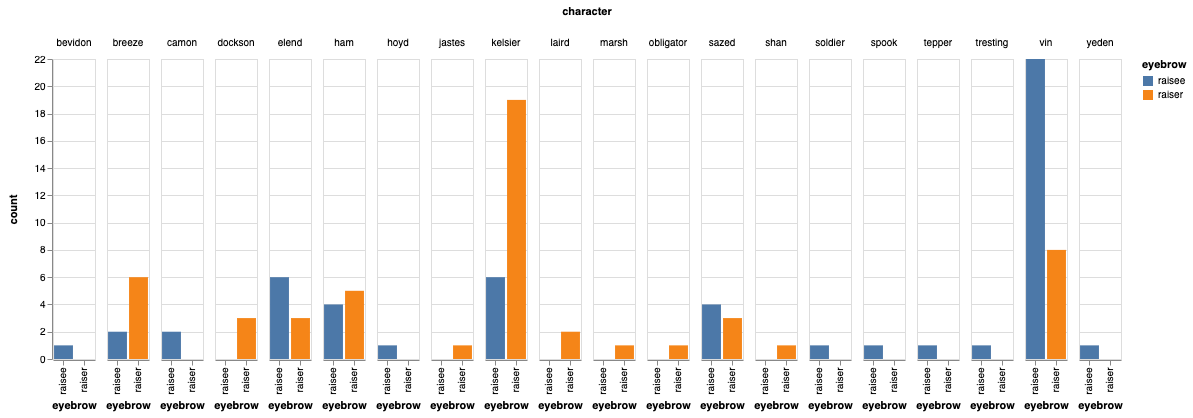

In [102]:
alt.Chart(data_melt).mark_bar().encode(
    x=alt.X('eyebrow:N'),
    y='count:Q',
    column='character:N',
    color='eyebrow:N'
)

In [108]:
raise_df

,character,raiser,raisee
0,kelsier,19,6
15,vin,8,22
19,breeze,6,2
3,ham,5,4
7,dockson,3,0
18,elend,3,6
4,sazed,3,4
5,laird,2,0
14,jastes,1,0
6,shan,1,0


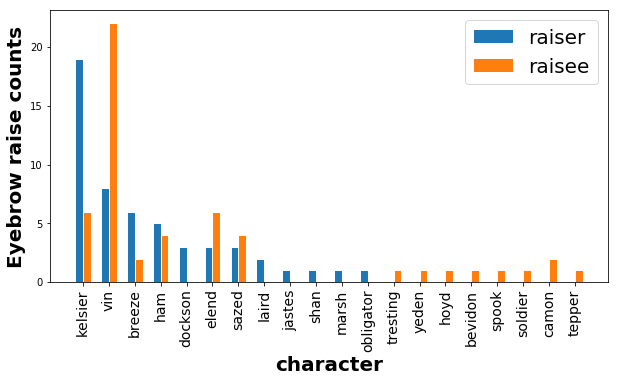

In [141]:
fig = plt.figure(figsize=(10,5))
# set width of bar
barWidth = .3

# set height of bar
bars1 = raise_df.raiser.values
bars2 = raise_df.raisee.values
# bars3 = raise_df.raiser.values
# bars4 = raise_df.raisee.values

# Set position of bar on X axis
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]

# Make the plot
plt.bar(r1, bars1, width=barWidth, edgecolor='white', label='raiser')
plt.bar(r2, bars2, width=barWidth, edgecolor='white', label='raisee')
# plt.bar(r3, bars3, width=barWidth, edgecolor='white', label='raiser')
# plt.bar(r4, bars4, width=barWidth, edgecolor='white', label='raisee')

# Add xticks on the middle of the group bars
plt.xlabel('character', fontweight='bold',size=20)
plt.xticks([r +barWidth/2 for r in range(len(bars1))], raise_df.character.values,rotation=90,size=14)

plt.ylabel("Eyebrow raise counts",fontweight='bold',size=20)

# Create legend & Show graphic
plt.legend(fontsize=20)
plt.show()
